In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('mnist_data/') 

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [6]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap='Greys', interpolation='nearest')

In [7]:
test_digits, test_labels = mnist.test.next_batch(200)

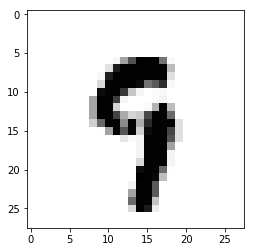

In [8]:
display_digit(test_digits[0])

In [9]:
n_steps = 28
n_inputs = 28
n_neurons = 200
n_outputs = 10

In [10]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [11]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [12]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [13]:
logits = tf.layers.dense(states, n_outputs)

In [14]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

In [15]:
loss = tf.reduce_mean(xentropy)

In [16]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.001)

In [17]:
training_op = optimizer.minimize(loss)

In [18]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [19]:
init = tf.global_variables_initializer()

In [20]:
test_digits = test_digits.reshape((-1, n_steps, n_inputs))

In [21]:
n_epochs = 10
batch_size = 150

In [22]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: test_digits, y: test_labels})
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.15333334 Test accuracy: 0.125
1 Train accuracy: 0.15333334 Test accuracy: 0.13
2 Train accuracy: 0.22666667 Test accuracy: 0.17
3 Train accuracy: 0.16666667 Test accuracy: 0.2
4 Train accuracy: 0.22666667 Test accuracy: 0.235
5 Train accuracy: 0.26 Test accuracy: 0.27
6 Train accuracy: 0.28666666 Test accuracy: 0.29
7 Train accuracy: 0.42 Test accuracy: 0.33
8 Train accuracy: 0.44 Test accuracy: 0.36
9 Train accuracy: 0.33333334 Test accuracy: 0.365
